## Feature Engineering (Attempt 1)
#### This attempt focuses on grouping extra columns together to reduce the dimensionality of the demographic data from ACS.

### This file is primarily for the purpose of feature engineering to produce a final clean dataframe with all values from ACS and ZRI together. Data generated here will be used for the purpose of training the models.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/ykath/Downloads/eastern-perigee-307720-5e9eb7dab12e.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery

### Extracting data from years 2015-2017 from Google BigQuery

In [2]:


%%bigquery acs_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|█████████████████████████████████████████████████████████████████| 130/130 [00:01<00:00, 66.35rows/s]


In [3]:
%%bigquery acs_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|█████████████████████████████████████████████████████████████████| 130/130 [00:01<00:00, 80.77rows/s]


In [4]:
%%bigquery acs_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|█████████████████████████████████████████████████████████████████| 130/130 [00:01<00:00, 81.70rows/s]


In [5]:
acs_zip_codes_2015_5yr["Year"]=2015
acs_zip_codes_2016_5yr["Year"]=2016
acs_zip_codes_2017_5yr["Year"]=2017

In [6]:
acs_cols_2015=acs_zip_codes_2015_5yr.columns
acs_cols_2016=acs_zip_codes_2016_5yr.columns
acs_cols_2017=acs_zip_codes_2017_5yr.columns

In [7]:
acs_cols_2017.tolist().index('pop_separated')

248

In [8]:
common_columns=list((((
(set(acs_cols_2015))).intersection(set(acs_cols_2016)))
                    .intersection(set(acs_cols_2017))))

In [9]:
frames=[acs_zip_codes_2015_5yr[common_columns],
        acs_zip_codes_2016_5yr[common_columns],
        acs_zip_codes_2017_5yr[common_columns]]
acs_all_phoenix=pd.concat(frames)

In [10]:
frames

[    less_one_year_college rent_10_to_15_percent female_65_to_66  \
 0           285.000000000         238.000000000    94.000000000   
 1           282.000000000         148.000000000    31.000000000   
 2           462.000000000          46.000000000   326.000000000   
 3          1211.000000000           8.000000000   331.000000000   
 4           191.000000000          43.000000000    63.000000000   
 5           481.000000000                  0E-9   197.000000000   
 6           390.000000000          68.000000000   154.000000000   
 7           551.000000000          87.000000000    77.000000000   
 8           977.000000000         542.000000000   275.000000000   
 9          2926.000000000         142.000000000  1130.000000000   
 10          132.000000000                  0E-9    35.000000000   
 11          422.000000000          25.000000000   214.000000000   
 12          949.000000000          39.000000000   271.000000000   
 13          692.000000000          71.000000000

In [11]:
acs_all_phoenix.head()
acs_all_phoenix.shape

(390, 247)

#### Calculating the extent of missingness in the data we have collected from 2015-2017

In [12]:
missingRowsACS = pd.isnull(acs_all_phoenix).sum(axis=1) > 0
missingColsACS = pd.isnull(acs_all_phoenix).sum(axis=0) > 0
print(missingColsACS.sum())
print(missingRowsACS.sum())

8
268


In [13]:
#Drop columns that have missing data for 2 or more zipcodes
for col in acs_all_phoenix.columns[missingColsACS]:
    if pd.isnull(acs_all_phoenix[col]).sum()>=0: 
        print(f"Dropping {col} from ACS")
        acs_all_phoenix.drop(col,axis=1,inplace=True)

Dropping speak_spanish_at_home_low_english from ACS
Dropping percent_income_spent_on_rent from ACS
Dropping renter_occupied_housing_units_paying_cash_median_gross_rent from ACS
Dropping speak_only_english_at_home from ACS
Dropping median_rent from ACS
Dropping speak_spanish_at_home from ACS
Dropping pop_5_years_over from ACS
Dropping aggregate_travel_time_to_work from ACS


In [14]:
acs_all_phoenix.shape

(390, 239)

In [15]:
acs_all_phoenix.isnull().sum()

less_one_year_college                                             0
rent_10_to_15_percent                                             0
female_65_to_66                                                   0
income_125000_149999                                              0
commuters_16_over                                                 0
male_pop                                                          0
rent_burden_not_computed                                          0
million_dollar_housing_units                                      0
housing_built_2005_or_later                                       0
walked_to_work                                                    0
married_households                                                0
children_in_single_female_hh                                      0
housing_built_1939_or_earlier                                     0
male_18_to_19                                                     0
commuters_by_carpool                            

In [16]:
acs_all_phoenix = acs_all_phoenix.reindex(sorted(acs_all_phoenix.columns), axis=1)

In [17]:
acs_all_phoenix.columns.tolist()

['Year',
 'amerindian_including_hispanic',
 'amerindian_pop',
 'armed_forces',
 'asian_including_hispanic',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'associates_degree',
 'bachelors_degree',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_including_hispanic',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
 'different_house_year_ago_different_city',
 'diffe

#### Grouping female age columns together

In [19]:
female_under_18 = acs_all_phoenix.female_under_5 + acs_all_phoenix.female_5_to_9 + acs_all_phoenix.female_10_to_14 + acs_all_phoenix.female_15_to_17 + acs_all_phoenix.female_18_to_19
female_under_60 = acs_all_phoenix.female_20 + acs_all_phoenix.female_21 + acs_all_phoenix.female_22_to_24 + acs_all_phoenix.female_25_to_29 + acs_all_phoenix.female_30_to_34 + acs_all_phoenix.female_35_to_39 + acs_all_phoenix.female_40_to_44 + acs_all_phoenix.female_45_to_49 + acs_all_phoenix.female_50_to_54 + acs_all_phoenix.female_55_to_59 
female_over_60 = acs_all_phoenix.female_60_to_61 + acs_all_phoenix.female_62_to_64 + acs_all_phoenix.female_65_to_66 + acs_all_phoenix.female_67_to_69 + acs_all_phoenix.female_70_to_74 + acs_all_phoenix.female_75_to_79 + acs_all_phoenix.female_80_to_84 + acs_all_phoenix.female_85_and_over

In [20]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [23]:
male_under_18 = acs_all_phoenix.male_under_5 + acs_all_phoenix.male_5_to_9 + acs_all_phoenix.male_10_to_14 + acs_all_phoenix.male_15_to_17 + acs_all_phoenix.male_18_to_19
male_under_60 = acs_all_phoenix.male_20 + acs_all_phoenix.male_21 + acs_all_phoenix.male_22_to_24 + acs_all_phoenix.male_25_to_29 + acs_all_phoenix.male_30_to_34 + acs_all_phoenix.male_35_to_39 + acs_all_phoenix.male_40_to_44 + acs_all_phoenix.male_45_to_49 + acs_all_phoenix.male_50_to_54 + acs_all_phoenix.male_55_to_59 
male_over_60 = acs_all_phoenix.male_60_61 + acs_all_phoenix.male_62_64 + acs_all_phoenix.male_65_to_66 + acs_all_phoenix.male_67_to_69 + acs_all_phoenix.male_70_to_74 + acs_all_phoenix.male_75_to_79 + acs_all_phoenix.male_80_to_84 + acs_all_phoenix.male_85_and_over

In [24]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping rent affordability columns together

In [25]:
under10 = acs_all_phoenix.rent_under_10_percent
tento50 = acs_all_phoenix.rent_40_to_50_percent + acs_all_phoenix.rent_35_to_40_percent + acs_all_phoenix.rent_30_to_35_percent+ acs_all_phoenix.rent_25_to_30_percent + acs_all_phoenix.rent_20_to_25_percent + acs_all_phoenix.rent_15_to_20_percent + acs_all_phoenix.rent_10_to_15_percent
over50 = acs_all_phoenix.rent_over_50_percent
uncomputed = acs_all_phoenix.rent_burden_not_computed

In [26]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [27]:
small_dwellings = acs_all_phoenix.dwellings_1_units_attached + acs_all_phoenix.dwellings_1_units_detached + acs_all_phoenix.dwellings_2_units + acs_all_phoenix.dwellings_3_to_4_units + acs_all_phoenix.dwellings_5_to_9_units
large_dwellings = acs_all_phoenix.dwellings_10_to_19_units + acs_all_phoenix.dwellings_20_to_49_units + acs_all_phoenix.dwellings_50_or_more_units

In [28]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [29]:
commute_less_than_30 = acs_all_phoenix.commute_5_9_mins + acs_all_phoenix.commute_less_10_mins + acs_all_phoenix.commute_10_14_mins + acs_all_phoenix.commute_15_19_mins + acs_all_phoenix.commute_20_24_mins + acs_all_phoenix.commute_25_29_mins
commute_less_than_60 = acs_all_phoenix.commute_30_34_mins + acs_all_phoenix.commute_35_39_mins + acs_all_phoenix.commute_35_44_mins + acs_all_phoenix.commute_40_44_mins + acs_all_phoenix.commute_45_59_mins
commute_over_60 = acs_all_phoenix.commute_60_89_mins + acs_all_phoenix.commute_60_more_mins + acs_all_phoenix.commute_90_more_mins

In [30]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [31]:
income_less_than_60000 = acs_all_phoenix.income_less_10000 + acs_all_phoenix.income_10000_14999 + acs_all_phoenix.income_15000_19999 + acs_all_phoenix.income_20000_24999 + acs_all_phoenix.income_25000_29999 + acs_all_phoenix.income_30000_34999 + acs_all_phoenix.income_35000_39999 + acs_all_phoenix.income_40000_44999 + acs_all_phoenix.income_45000_49999 + acs_all_phoenix.income_50000_59999
income_less_than_125000 = acs_all_phoenix.income_60000_74999 + acs_all_phoenix.income_75000_99999 + acs_all_phoenix.income_100000_124999
income_over_125000 = acs_all_phoenix.income_125000_149999 + acs_all_phoenix.income_150000_199999 + acs_all_phoenix.income_200000_or_more

In [32]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [37]:
employed_creative = acs_all_phoenix.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_phoenix.employed_education_health_social + acs_all_phoenix.employed_finance_insurance_real_estate + acs_all_phoenix.employed_information + acs_all_phoenix.employed_science_management_admin_waste
employed_skill = acs_all_phoenix.employed_manufacturing + acs_all_phoenix.employed_construction + acs_all_phoenix.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_phoenix.employed_retail_trade + acs_all_phoenix.employed_other_services_not_public_admin + acs_all_phoenix.employed_public_administration + acs_all_phoenix.employed_transportation_warehousing_utilities + acs_all_phoenix.employed_wholesale_trade

#### Choosing family type columns

In [38]:
two_parent_hh = acs_all_phoenix.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_phoenix.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [39]:
asian_pop = acs_all_phoenix.asian_pop.astype(float)
asian_including_hispanic = acs_all_phoenix.asian_including_hispanic.astype(float)
black_pop = acs_all_phoenix.black_pop.astype(float)
hispanic_pop = acs_all_phoenix.hispanic_pop.astype(float)
white_pop = acs_all_phoenix.white_pop.astype(float)
amerindian_pop = acs_all_phoenix.amerindian_pop.astype(float)
amerindian_including_hispanic = acs_all_phoenix.amerindian_including_hispanic.astype(float)
other_race_pop = acs_all_phoenix.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_phoenix.other_race_pop.astype(float)
not_hispanic_pop = acs_all_phoenix.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_phoenix.not_us_citizen_pop.astype(float)
total_pop = acs_all_phoenix.total_pop.astype(float)

In [40]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop, amerindian_including_hispanic,other_race_pop,two_or_more_races_pop]

In [41]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+amerindian_including_hispanic.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

12758902.0
12789262.0
12789262.0


#### Grouping education level columns together

In [42]:
college_educated = acs_all_phoenix.in_undergrad_college + acs_all_phoenix.some_college_and_associates_degree + acs_all_phoenix.associates_degree + acs_all_phoenix.bachelors_degree + acs_all_phoenix.bachelors_degree_2 +acs_all_phoenix.bachelors_degree_or_higher_25_64 + acs_all_phoenix.masters_degree + acs_all_phoenix.graduate_professional_degree + acs_all_phoenix.one_year_more_college     
in_school = acs_all_phoenix.in_grades_1_to_4 + acs_all_phoenix.in_grades_5_to_8 + acs_all_phoenix.in_grades_9_to_12
inschoolcheck = acs_all_phoenix.in_school
less_than_college_educated = acs_all_phoenix.less_one_year_college + + acs_all_phoenix.less_one_year_college
high_school_educated = acs_all_phoenix.high_school_diploma + acs_all_phoenix.high_school_including_ged

In [43]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [44]:
print(in_school.sum())
print(inschoolcheck.sum())

2176988.0
3417886.0


#### Grouping commute type columns together

In [45]:
public_commute = acs_all_phoenix.commuters_by_public_transportation + acs_all_phoenix.commuters_by_subway_or_elevated + acs_all_phoenix.commuters_by_bus
personal_commute = acs_all_phoenix.commuters_by_car_truck_van + acs_all_phoenix.commuters_by_carpool + acs_all_phoenix.commuters_drove_alone

In [46]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [47]:
vacant_housing_units = acs_all_phoenix.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_phoenix.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_phoenix.vacant_housing_units_for_sale.astype(float)

In [48]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

699622.0
225072.0


#### Choosing owner occuppied housing units

In [49]:
owner_occupied_housing_units = acs_all_phoenix.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_phoenix.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_phoenix.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_phoenix.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [50]:
unemployed_pop = acs_all_phoenix.unemployed_pop.astype(float)
employed_pop = acs_all_phoenix.employed_pop.astype(float)

#### Choosing family information

In [51]:
family_households = acs_all_phoenix.family_households.astype(float)
nonfamily_households = acs_all_phoenix.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [52]:
Year = acs_all_phoenix.Year.astype(int)
geo_id = acs_all_phoenix.geo_id.astype(int)
gini_index = acs_all_phoenix.gini_index.astype(float)
income_per_capita = acs_all_phoenix.income_per_capita.astype(float)
median_age = acs_all_phoenix.median_age.astype(float)
median_income = acs_all_phoenix.median_income.astype(float)
married_households = acs_all_phoenix.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [53]:
dict = {'Year': Year, 'geo_id': geo_id, 'gini_index':gini_index, 'income_per_capita':income_per_capita,
       'median_age':median_age, 'median_income':median_income, 'married_households':married_households,
       'family_households':family_households, 'nonfamily_households':nonfamily_households,
       'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 'owner_occupied_housing_units':owner_occupied_housing_units,
       'owner_occupied_housing_units_lower_value_quartile':owner_occupied_housing_units_lower_value_quartile,
       'owner_occupied_housing_units_median_value':owner_occupied_housing_units_median_value,
       'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
       'vacant_housing_units':vacant_housing_units,'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
       'vacant_housing_units_for_sale':vacant_housing_units_for_sale, 'public_commute':public_commute,
       'personal_commute':personal_commute, 'college_educated':college_educated, 'in_school':in_school,
       'less_than_college_educated':less_than_college_educated, 'high_school_educated':high_school_educated,
       'asian_pop':asian_pop, 'amerindian_pop':amerindian_pop, 'black_pop':black_pop, 'hispanic_pop':hispanic_pop, 
        'white_pop':white_pop, 'amerindian_including_hispanic':amerindian_including_hispanic,
        'other_race_pop':other_race_pop,'two_or_more_races_pop':two_or_more_races_pop, 'two_parent_hh':two_parent_hh,
       'one_parent_hh':one_parent_hh,'employed_creative':employed_creative, 'employed_prof':employed_prof,
       'employed_skill':employed_skill, 'employed_service':employed_service,'income_less_than_60000':income_less_than_60000,
       'income_less_than_125000':income_less_than_125000, 'income_over_125000':income_over_125000,
       'commute_less_than_30':commute_less_than_30, 'commute_less_than_60':commute_less_than_60,
       'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings, 'large_dwellings':large_dwellings,
       'rent_under10':rent_under10, 'rent_tento50':rent_tento50, 'rent_over50':rent_over50, 'rent_uncomputed':rent_uncomputed,
       'male_under_18':male_under_18, 'male_under_60':male_under_60, 'male_over_60':male_over_60,
       'female_under_18':female_under_18, 'female_under_60':female_under_60, 'female_over_60':female_over_60}

In [54]:
acs_final = pd.DataFrame(dict)

In [56]:
acs_final.shape

(390, 56)

In [57]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,amerindian_including_hispanic,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
0,2015,85003,0.5317,30082.0,37.3,41038.0,957.0,1467.0,2478.0,377.0,4081.0,1247.0,161000.0,288500.0,387000.0,886.0,396.0,58.0,622.0,5658.0,10370.0,986.0,570.0,2343.0,200.0,126.0,992.0,3461.0,4542.0,157.0,7.0,7.0,206.0,372.0,426.000000000,2015.000000000,356.000000000,1284.000000000,2398.0,972.0,575.0,3016.0,1238.0,620.0,2526.0,2283.0,84.0,1845.0,560.0,209.0,935.0,3948.0,682.0,741.0,2538.0,635.0
1,2015,85004,0.5950,31399.0,35.9,30202.0,272.0,500.0,1525.0,194.0,2198.0,577.0,98200.0,238300.0,342300.0,769.0,250.0,225.0,244.0,2586.0,5564.0,223.0,564.0,1394.0,118.0,51.0,337.0,1461.0,2588.0,103.0,0.0,0.0,65.0,94.0,292.000000000,1113.000000000,264.000000000,529.000000000,1384.0,349.0,292.0,1723.0,486.0,110.0,1085.0,1709.0,49.0,1097.0,218.0,84.0,278.0,1782.0,468.0,376.0,1322.0,384.0
2,2015,85262,0.4994,81380.0,55.3,124848.0,3323.0,3568.0,920.0,267.0,4539.0,4134.0,442900.0,649500.0,982400.0,2766.0,88.0,299.0,0.0,6936.0,17548.0,1021.0,924.0,1808.0,466.0,48.0,247.0,118.0,9318.0,48.0,0.0,0.0,320.0,72.0,242.000000000,2444.000000000,731.000000000,1122.000000000,915.0,1333.0,2240.0,1232.0,2507.0,912.0,7254.0,0.0,0.0,307.0,13.0,34.0,884.0,2081.0,2439.0,603.0,2435.0,1943.0
3,2015,85118,0.4580,43175.0,63.7,62715.0,3830.0,4074.0,1612.0,423.0,3589.0,4969.0,156400.0,245500.0,351200.0,2608.0,88.0,11.0,0.0,5878.0,15431.0,711.0,2422.0,5063.0,248.0,8.0,93.0,639.0,10759.0,8.0,0.0,0.0,138.0,23.0,280.000000000,1573.000000000,737.000000000,999.000000000,2773.0,1835.0,1078.0,1667.0,1600.0,642.0,7214.0,0.0,0.0,508.0,75.0,134.0,491.0,1900.0,3423.0,490.0,2023.0,3530.0
4,2015,85631,0.3618,17884.0,33.9,43629.0,658.0,975.0,343.0,299.0,1341.0,918.0,56800.0,73600.0,94600.0,298.0,38.0,0.0,2.0,2476.0,2892.0,830.0,382.0,1373.0,0.0,0.0,2.0,2343.0,1680.0,0.0,0.0,0.0,260.0,166.0,77.000000000,442.000000000,448.000000000,374.000000000,806.0,465.0,47.0,509.0,440.0,1118.0,1406.0,38.0,0.0,312.0,36.0,52.0,815.0,715.0,432.0,573.0,1000.0,507.0


<AxesSubplot:>

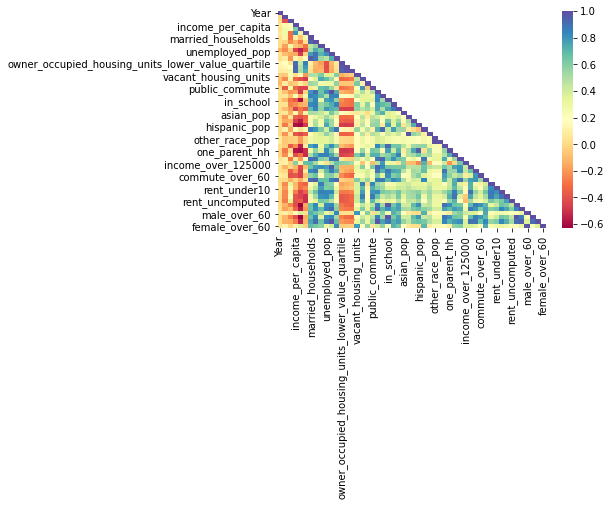

In [59]:
import seaborn as sns
corr_df =  acs_final.corr(method='pearson') 

df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

hmap=sns.heatmap(df_lt,cmap="Spectral")
hmap

In [ ]:
zriall=pd.read_csv("C:/Users/ykath/Downloads/Zip_Zri_AllHomesPlusMultifamily.csv")

In [ ]:
zriall.rename(columns={"RegionName":"zipcode"},inplace=True)

In [ ]:
missingMetros = pd.isnull(zriall["Metro"])
zriall=zriall[~missingMetros]